In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load the Dataset
df = pd.read_csv("updated_flight_delays.csv")

display(df.head())

#check duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows :", duplicate_rows_df.shape)

df = df.drop_duplicates()
df.head()

#Check Missing or Null values
print(df.isnull().sum())


,OP_CARRIER_FL_NUM,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,AIR_TIME,...,DEST_ORD,DEST_OTHER,DEST_PHL,DEST_PHX,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,Delay_Type
0,3280,601.0,1.0,22.0,623.0,714.0,8.0,722.0,-1.0,51.0,...,False,False,False,False,False,False,False,False,False,No Delay
1,3281,1359.0,-5.0,15.0,1414.0,1629.0,4.0,1633.0,-36.0,75.0,...,False,True,False,False,False,False,False,False,False,No Delay
2,3282,1215.0,-5.0,18.0,1233.0,1323.0,6.0,1329.0,-16.0,50.0,...,False,True,False,False,False,False,False,False,False,No Delay
3,3283,1521.0,-6.0,14.0,1535.0,1618.0,7.0,1625.0,-14.0,43.0,...,False,False,False,False,False,False,False,False,False,No Delay
4,3284,1847.0,-15.0,18.0,1905.0,1935.0,5.0,1940.0,-25.0,90.0,...,False,True,False,False,False,False,False,False,False,No Delay


Number of duplicate rows : (522, 99)
OP_CARRIER_FL_NUM    0
DEP_TIME             0
DEP_DELAY            0
TAXI_OUT             0
WHEELS_OFF           0
                    ..
DEST_SEA             0
DEST_SFO             0
DEST_SLC             0
DEST_TPA             0
Delay_Type           0
Length: 99, dtype: int64


In [2]:
df.shape

(5033236, 99)

In [7]:
df.columns

Index(['OP_CARRIER_FL_NUM', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'CARRIER_9E',
       'CARRIER_AA', 'CARRIER_AS', 'CARRIER_B6', 'CARRIER_DL', 'CARRIER_EV',
       'CARRIER_F9', 'CARRIER_G4', 'CARRIER_HA', 'CARRIER_MQ', 'CARRIER_NK',
       'CARRIER_OH', 'CARRIER_OO', 'CARRIER_UA', 'CARRIER_WN', 'CARRIER_YV',
       'CARRIER_YX', 'ORIGIN_ATL', 'ORIGIN_BNA', 'ORIGIN_BOS', 'ORIGIN_BWI',
       'ORIGIN_CLT', 'ORIGIN_DAL', 'ORIGIN_DCA', 'ORIGIN_DEN', 'ORIGIN_DFW',
       'ORIGIN_DTW', 'ORIGIN_EWR', 'ORIGIN_FLL', 'ORIGIN_IAD', 'ORIGIN_IAH',
       'ORIGIN_JFK', 'ORIGIN_LAS', 'ORIGIN_LAX', 'ORIGIN_LGA', 'ORIGIN_MCO',
       'ORIGIN_MDW', 'ORIGIN_MIA', 'ORIGIN_MSP', 'ORIGIN_ORD', 'ORIGIN_OTHER',
       'ORIGIN_PHL', 'ORIGIN_PHX', 'ORIGIN_SAN', 'ORIGIN_SEA', 'ORIGIN_SFO'

Explained Variance per Component:
 [0.73464613 0.20392297 0.03935097]
Number of components kept (95% variance): 3


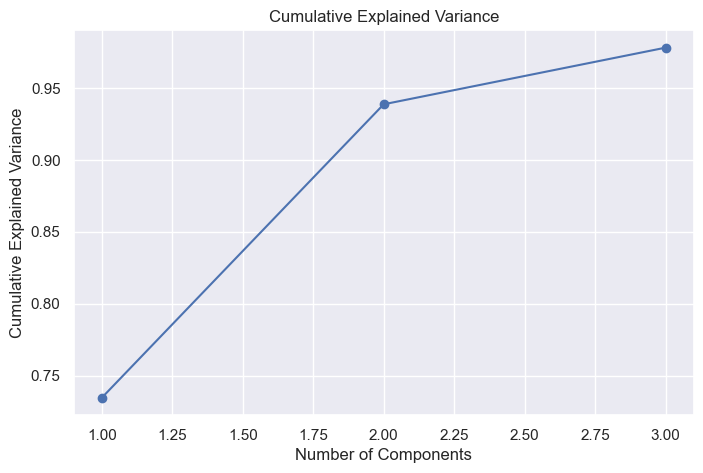

In [23]:
#Dimension Reduction (PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


X = df.drop(columns=["ARR_DELAY"])
y = df["ARR_DELAY"] #target

# Make sure features are numeric
X = pd.get_dummies(X, drop_first=True)

#PCA to retain 95% variance
pca95 = PCA(n_components=0.95)
X_pca95 = pca95.fit_transform(X)

explained_variance = pca95.explained_variance_ratio_
print("Explained Variance per Component:\n", explained_variance)
print("Number of components kept (95% variance):", pca95.n_components_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


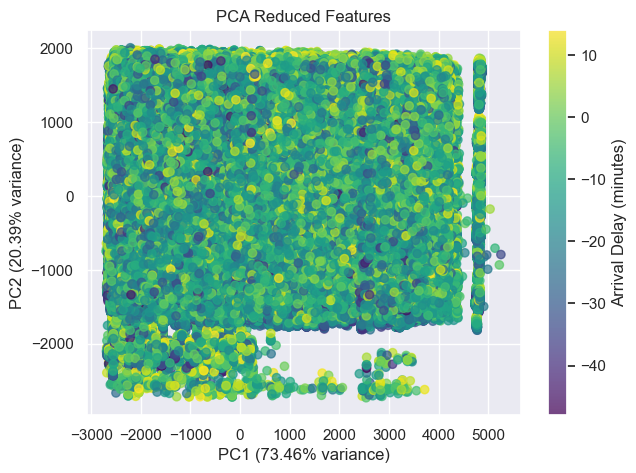

In [24]:

# PCA into 2 dimensions
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

plt.figure(figsize=(7,5))
scatter = plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.xlabel(f'PC1 ({pca2.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca2.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('PCA Reduced Features')
plt.colorbar(scatter, label="Arrival Delay (minutes)")
plt.show()
